In [89]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [90]:
def getData(stockName,period,interval):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [91]:
df=getData('TUR','1y','1h')['Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


In [92]:
df

,Close
Datetime,
2022-06-08 09:30:00-04:00,20.690001
2022-06-08 10:30:00-04:00,20.150000
2022-06-08 11:30:00-04:00,20.209999
2022-06-08 12:30:00-04:00,20.160000
2022-06-08 13:30:00-04:00,20.110001
...,...
2023-06-07 11:30:00-04:00,30.070000
2023-06-07 12:30:00-04:00,30.010000
2023-06-07 13:30:00-04:00,30.070000


In [93]:
df['Close-1']=df['Close'].shift(1)
df=df.dropna()

In [94]:
df['diff']=df['Close']-df['Close-1']
df['label']=np.where(df['diff']>0,1,0)

/var/folders/v8/t_1wydzn4cv_hlthh3k9_pdr0000gn/T/ipykernel_3133/1594075336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff']=df['Close']-df['Close-1']
/var/folders/v8/t_1wydzn4cv_hlthh3k9_pdr0000gn/T/ipykernel_3133/1594075336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=np.where(df['diff']>0,1,0)


In [95]:
df

,Close,Close-1,diff,label
Datetime,,,,
2022-06-08 10:30:00-04:00,20.150000,20.690001,-0.540001,0
2022-06-08 11:30:00-04:00,20.209999,20.150000,0.059999,1
2022-06-08 12:30:00-04:00,20.160000,20.209999,-0.049999,0
2022-06-08 13:30:00-04:00,20.110001,20.160000,-0.049999,0
2022-06-08 14:30:00-04:00,20.150000,20.110001,0.039999,1
...,...,...,...,...
2023-06-07 11:30:00-04:00,30.070000,30.180000,-0.110001,0
2023-06-07 12:30:00-04:00,30.010000,30.070000,-0.059999,0
2023-06-07 13:30:00-04:00,30.070000,30.010000,0.059999,1


In [96]:
lagh = [3,4,5,6,7]
window = [3,4,5]

for i in lagh:
    df[f'Close_lag_{i}']=df['Close'].shift(i)
#    for j in window:
#        df[f'Close_wind_{j}_lag_{i}']=df['Close'].rolling(j).mean().shift(i)

/var/folders/v8/t_1wydzn4cv_hlthh3k9_pdr0000gn/T/ipykernel_3133/3625848688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close_lag_{i}']=df['Close'].shift(i)
/var/folders/v8/t_1wydzn4cv_hlthh3k9_pdr0000gn/T/ipykernel_3133/3625848688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close_lag_{i}']=df['Close'].shift(i)
/var/folders/v8/t_1wydzn4cv_hlthh3k9_pdr0000gn/T/ipykernel_3133/3625848688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [97]:
df=df.dropna()

In [98]:
df

,Close,Close-1,diff,label,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6,Close_lag_7
Datetime,,,,,,,,,
2022-06-09 10:30:00-04:00,19.490000,19.370001,0.119999,1,20.150000,20.110001,20.160000,20.209999,20.150000
2022-06-09 11:30:00-04:00,19.770000,19.490000,0.280001,1,20.200001,20.150000,20.110001,20.160000,20.209999
2022-06-09 12:30:00-04:00,19.590000,19.770000,-0.180000,0,19.370001,20.200001,20.150000,20.110001,20.160000
2022-06-09 13:30:00-04:00,19.690001,19.590000,0.100000,1,19.490000,19.370001,20.200001,20.150000,20.110001
2022-06-09 14:30:00-04:00,19.650000,19.690001,-0.040001,0,19.770000,19.490000,19.370001,20.200001,20.150000
...,...,...,...,...,...,...,...,...,...
2023-06-07 11:30:00-04:00,30.070000,30.180000,-0.110001,0,32.610001,32.580002,32.579899,32.560001,32.560001
2023-06-07 12:30:00-04:00,30.010000,30.070000,-0.059999,0,30.459999,32.610001,32.580002,32.579899,32.560001
2023-06-07 13:30:00-04:00,30.070000,30.010000,0.059999,1,30.180000,30.459999,32.610001,32.580002,32.579899


In [108]:
X = df.reset_index().drop(columns=['Close','Close-1','Datetime','diff','label'])
y = df.reset_index()['label']

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [114]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [115]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
pred = model.predict(X_test)

In [117]:
dy=y_test.to_frame()
dy['prd']=pred
dy['prb']=model.predict_proba(X_test)[:,1]

In [118]:
dy.head(30)

,label,prd,prb
599,0,1,0.905265
1201,0,0,0.369946
628,0,0,0.471168
1642,1,1,0.698831
1263,1,0,0.183633
931,1,0,0.014450
23,1,0,0.264686
844,1,0,0.280088
964,1,1,0.892726
764,1,0,0.291920


In [119]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,pred)

1009563489147852.0

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       292
           1       0.50      0.47      0.48       279

    accuracy                           0.51       571
   macro avg       0.51      0.51      0.51       571
weighted avg       0.51      0.51      0.51       571



<AxesSubplot:>

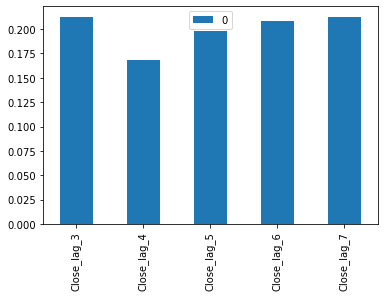

In [120]:
pd.DataFrame(model.feature_importances_,index=model.feature_names_in_).plot(kind='bar')